In [1]:
import numpy as np
import tensorflow as tf
from PIL import Image
import os

In [ ]:
# 학습된 모델 불러오기
cnn = tf.keras.models.load_model("D:/김동영/source_3/ch7/my_cnn_for_deploy.h5") # "D:/김동영/source_3/ch7/my_cnn_for_deploy.h5"

# class
class_names=['airplane','automobile','bird','cat','deer','dog','flog','horse','ship','truck'] # CIFAR-10의 부류 이름

c:\Users\KimDongyoung\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\KimDongyoung\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\optimizers\base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


for fios.listdir("D:/김동영/source_3/ch7/test_images")

In [7]:
os.listdir("D:/김동영/source_3/ch7/test_images")

['01.jpg',
 '02.jpg',
 '03.jpg',
 '04.jpg',
 '05.jpg',
 '06.jpg',
 '07.jpg',
 '08.jpg',
 '09.jpg',
 '10.jpg',
 '11.jpg',
 '12.jpg',
 'label.txt']

In [8]:
for filename in os.listdir("D:/김동영/source_3/ch7/test_images"):
  if 'jpg' in filename:
    print('없음음')

없음음
없음음
없음음
없음음
없음음
없음음
없음음
없음음
없음음
없음음
없음음
없음음


In [18]:
# # 테스트 이미지 경로
# test_images_path = "D:/김동영/source_3/ch7/test_images"

# for filename in os.listdir(test_images_path): # 폴더에서 테스트 영상 읽기, "D:/김동영/source_3/ch7/test_images"
#     if 'jpg' not in filename:
#         continue
#     img=Image.open("./test_images/"+filename)
#     x=np.asarray(img.resize([32,32]))/255.0
#     x_test.append(x)
# x_test=np.asarray(x_test)


# 테스트 이미지 경로
test_images_path = "D:/김동영/source_3/ch7/test_images"

# 경로가 존재하는지 확인
if not os.path.exists(test_images_path):
    print(f"경로가 존재하지 않습니다: {test_images_path}")
else:
    x_test = []
    img_orig = []
    fname=[]
    for filename in os.listdir(test_images_path):
        if 'jpg' not in filename:
            continue
        img_path = os.path.join(test_images_path, filename)
        try:
            img = Image.open(img_path)
            img_orig.append(img)
            fname.append(filename)
            x = np.asarray(img.resize([32, 32])) / 255.0
            x_test.append(x)
        except FileNotFoundError:
            print(f"파일을 찾을 수 없습니다: {img_path}")
    x_test = np.asarray(x_test)

In [19]:
pred=cnn.predict(x_test) # 예측
print(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[[9.99998331e-01 7.03214653e-10 1.46756221e-07 1.93375134e-12
  6.62823268e-12 2.13516267e-16 2.73792415e-16 2.43426999e-15
  1.55774637e-06 2.49173546e-11]
 [1.09631130e-02 4.53655139e-06 6.99034810e-01 2.02959627e-02
  6.36369959e-02 3.69342451e-04 2.05625728e-01 1.00397201e-05
  5.60408225e-05 3.40300630e-06]
 [1.23458587e-22 1.00000000e+00 1.19328093e-26 3.13601689e-35
  0.00000000e+00 8.58989197e-36 1.87039172e-31 1.27597485e-36
  7.94555900e-22 1.55549087e-12]
 [1.57414273e-12 1.33295241e-11 3.43926598e-09 9.98561680e-01
  3.64418847e-05 1.07682834e-03 3.25112662e-04 7.93281607e-10
  2.05789257e-11 8.46088061e-11]
 [1.61514464e-08 1.64547358e-13 1.11450704e-09 1.02755093e-09
  9.99984026e-01 1.20494548e-09 2.08394523e-17 1.59743558e-05
  2.37799214e-14 8.82930007e-10]
 [4.59831604e-08 1.10475638e-08 5.81572019e-03 4.25285471e-05
  1.09846027e-04 9.79131579e-01 6.54308323e-08 1.48999747e-02
  9.16819745e-11 2.79219847e-07]
 [2.84136892e-09 6.3

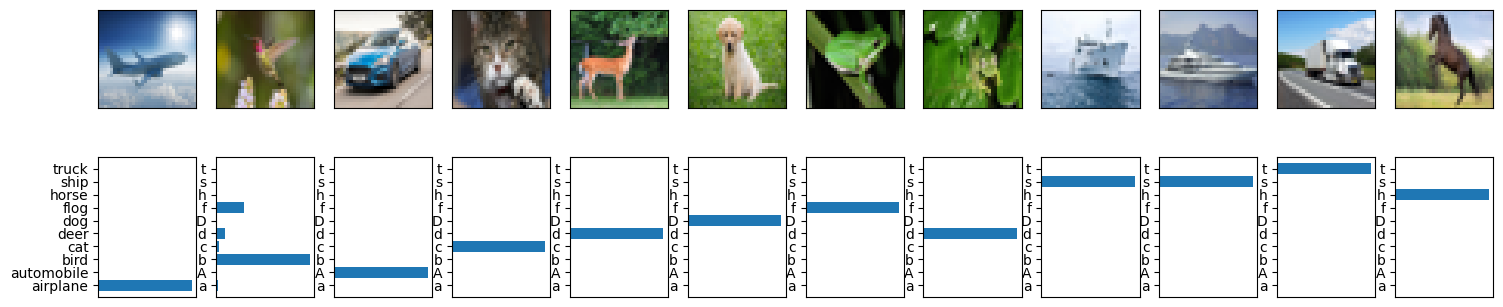

In [20]:
import matplotlib.pyplot as plt

n=len(x_test)
plt.figure(figsize=(18,4))

for i in range(n):
    plt.subplot(2,n,i+1)
    plt.imshow(x_test[i])
    plt.xticks([]);plt.yticks([])
    plt.subplot(2,n,n+i+1)
    if i==0:
        plt.barh(class_names,pred[i])
    else:
        plt.barh(['a','A','b','c','d','D','f','h','s','t'],pred[i])
    plt.xticks([])

In [22]:
os.chdir('D:/김동영/source_3/ch7/test_images')
if not os.path.isdir('class_buckets'):
    os.mkdir('class_buckets')
os.chdir('class_buckets')
for i in range(len(class_names)): # 부류별로 폴더 만들기
    if not os.path.isdir(class_names[i]):
        os.mkdir(class_names[i])

for i in range(len(x_test)): # 인식 결과에 따라 폴더에 저장
    folder_name=class_names[np.argmax(pred[i])]
    os.chdir(folder_name)
    img_orig[i].save(fname[i])
    os.chdir('..')

In [27]:
import numpy as np
import tensorflow as tf
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk
import winsound
from gtts import gTTS
import playsound
import os

In [ ]:
cnn=tf.keras.models.load_model("D:/김동영/source_3/ch7/my_cnn_for_deploy.h5") # 학습된 모델 불러오기

class_names_en=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck'] # CIFAR-10의 부류 이름(영어)
class_names_fr=['avion','voiture','oiseau','chatte','biche','chienne','grenouille','jument','navire','un camion'] # CIFAR-10의 부류 이름(프랑스어)
class_names_de=['Flugzeug','Automobil','Vogel','Katze','Hirsch','Hund','Frosch','Pferd','Schiff','LKW'] # CIFAR-10의 부류 이름(독일어)

class_id=0
tk_img=''

In [33]:
def process_image(): # 사용자가 선택한 영상을 인식하고 결과를 저장
    global class_id, tk_img

    fname=filedialog.askopenfilename() # 사용자가 폴더에서 영상을 선택하게 함
    img=Image.open(fname)
    tk_img=img.resize([128,128])
    tk_img=ImageTk.PhotoImage(tk_img)
    canvas.create_image((canvas.winfo_width()/2,canvas.winfo_height()/2),image=tk_img,anchor='center')

    x_test=[]
    x=np.asarray(img.resize([32,32]))/255.0
    x_test.append(x)
    x_test=np.asarray(x_test)
    res=cnn.predict(x_test) # 영상 인식
    class_id=np.argmax(res)
    label_en['text']='영어: '+class_names_en[class_id] # 레이블 위젯용 텍스트 만들기
    label_fr['text']='프랑스어: '+class_names_fr[class_id]
    label_de['text']='독일어: '+class_names_de[class_id]
    winsound.Beep(frequency=500,duration=250)

def tts_english(): # 영어로 들려주기
    tts=gTTS(text=class_names_en[class_id],lang='en')
    if os.path.isfile('word.mp3'): os.remove('word.mp3')
    tts.save('word.mp3')
    playsound.playsound('word.mp3',True)

def tts_french(): # 프랑스어로 들려주기
    tts=gTTS(text=class_names_fr[class_id],lang='fr')
    if os.path.isfile('word.mp3'): os.remove('word.mp3')
    tts.save('word.mp3')
    playsound.playsound('word.mp3',True)

def tts_deutsch(): # 독일어로 들려주기
    tts=gTTS(text=class_names_de[class_id],lang='de')
    if os.path.isfile('word.mp3'): os.remove('word.mp3')
    tts.save('word.mp3')
    playsound.playsound('word.mp3',True)

def quit_program(): # 프로그램 종료
    win.destroy()


In [34]:
win=tk.Tk()
win.title('다국어 단어 공부')
win.geometry('512x500')

''

In [36]:
process_button=tk.Button(win,text='영상 선택',command=process_image) # 위젯 생성
quit_button=tk.Button(win,text='끝내기',command=quit_program)
canvas=tk.Canvas(win,width=256,height=256,bg='cyan',bd=4)
label_en=tk.Label(win,width=16,height=1,bg='yellow',bd=4,text='영어',anchor='w')
label_fr=tk.Label(win,width=16,height=1,bg='yellow',bd=4,text='프랑스어',anchor='w')
label_de=tk.Label(win,width=16,height=1,bg='yellow',bd=4,text='독일어',anchor='w')
tts_en=tk.Button(win,text='듣기',command=tts_english)
tts_fr=tk.Button(win,text='듣기',command=tts_french)
tts_de=tk.Button(win,text='듣기',command=tts_deutsch)

process_button.grid(row=0,column=0) # 위젯 배치
quit_button.grid(row=1,column=0)
canvas.grid(row=0,column=1)
label_en.grid(row=1,column=1,sticky='e')
label_fr.grid(row=2,column=1,sticky='e')
label_de.grid(row=3,column=1,sticky='e')
tts_en.grid(row=1,column=2,sticky='w')
tts_fr.grid(row=2,column=2,sticky='w')
tts_de.grid(row=3,column=2,sticky='w')

In [37]:
win.mainloop() # GUI 실행

In [39]:
import numpy as np
import tensorflow as tf
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk
import winsound
from gtts import gTTS
import playsound
import os
import cv2

In [41]:
cnn=tf.keras.models.load_model("D:/김동영/source_3/ch7/my_cnn_for_deploy.h5")

class_names_en=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
class_names_fr=['avion','voiture','oiseau','chatte','biche','chienne','grenouille','jument','navire','un camion']
class_names_de=['Flugzeug','Automobil','Vogel','Katze','Hirsch','Hund','Frosch','Pferd','Schiff','LKW']

class_id=0
tk_img=''

def process_video():
    global class_id, tk_img

    video=cv2.VideoCapture(0)
    while video.isOpened():
        success,frame=video.read()
        if success:
            cv2.imshow('Camera',frame)
            key=cv2.waitKey(1) & 0xFF
            if key==27:
                break

    video.release()
    cv2.destroyAllWindows()

    frame=cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
    img=Image.fromarray(frame)

    tk_img=img.resize([128,128])
    tk_img=ImageTk.PhotoImage(tk_img)
    canvas.create_image((canvas.winfo_width()/2,canvas.winfo_height()/2),image=tk_img,anchor='center')

    x_test=[]
    x=np.asarray(img.resize([32,32]))/255.0
    x_test.append(x)
    x_test=np.asarray(x_test)
    res=cnn.predict(x_test)
    class_id=np.argmax(res)
    label_en['text']='영어: '+class_names_en[class_id]
    label_fr['text']='프랑스어: '+class_names_fr[class_id]
    label_de['text']='독일어: '+class_names_de[class_id]
    winsound.Beep(frequency=500,duration=250)

def tts_english():
    tts=gTTS(text=class_names_en[class_id],lang='en')
    if os.path.isfile('word.mp3'): os.remove('word.mp3')
    tts.save('word.mp3')
    playsound.playsound('word.mp3',True)

def tts_french():
    tts=gTTS(text=class_names_fr[class_id],lang='fr')
    if os.path.isfile('word.mp3'): os.remove('word.mp3')
    tts.save('word.mp3')
    playsound.playsound('word.mp3',True)

def tts_deutsch():
    tts=gTTS(text=class_names_de[class_id],lang='de')
    if os.path.isfile('word.mp3'): os.remove('word.mp3')
    tts.save('word.mp3')
    playsound.playsound('word.mp3',True)

def quit_program():
    win.destroy()

win=tk.Tk()
win.title('다국어 단어 공부')
win.geometry('512x500')

process_button=tk.Button(win,text='비디오 선택',command=process_video)
quit_button=tk.Button(win,text='끝내기',command=quit_program)
canvas=tk.Canvas(win,width=256,height=256,bg='cyan',bd=4)
label_en=tk.Label(win,width=16,height=1,bg='yellow',bd=4,text='영어',anchor='w')
label_fr=tk.Label(win,width=16,height=1,bg='yellow',bd=4,text='프랑스어',anchor='w')
label_de=tk.Label(win,width=16,height=1,bg='yellow',bd=4,text='독일어',anchor='w')
tts_en=tk.Button(win,text='듣기',command=tts_english)
tts_fr=tk.Button(win,text='듣기',command=tts_french)
tts_de=tk.Button(win,text='듣기',command=tts_deutsch)

process_button.grid(row=0,column=0)
quit_button.grid(row=1,column=0)
canvas.grid(row=0,column=1)
label_en.grid(row=1,column=1,sticky='e')
label_fr.grid(row=2,column=1,sticky='e')
label_de.grid(row=3,column=1,sticky='e')
tts_en.grid(row=1,column=2,sticky='w')
tts_fr.grid(row=2,column=2,sticky='w')
tts_de.grid(row=3,column=2,sticky='w')

win.mainloop()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


In [3]:
import numpy as np
import cv2
import winsound
import os

In [4]:
weights_path = 'D:/김동영/source_3/ch7/yolov3.weights'
cfg_path = 'D:/김동영/source_3/ch7/yolov3.cfg'

# 경로 확인
if not os.path.exists(weights_path):
    print(f"weights 파일이 존재하지 않습니다: {weights_path}")
if not os.path.exists(cfg_path):
    print(f"cfg 파일이 존재하지 않습니다: {cfg_path}")

# YOLO 모델 로드
yolo_model = cv2.dnn.readNet(weights_path, cfg_path)

error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\dnn\src\darknet\darknet_importer.cpp:210: error: (-212:Parsing error) Failed to open NetParameter file: D:/김동영/source_3/ch7/yolov3.cfg in function 'cv::dnn::dnn4_v20240521::readNetFromDarknet'


In [55]:
import os
weights_path = 'D:/yolov3.weights'
# cfg_path = 'yolov3.cfg'

# if not os.path.exists(weights_path):
#     print(f"weights 파일이 존재하지 않습니다: {weights_path}")
# if not os.path.exists(cfg_path):
#     print(f"cfg 파일이 존재하지 않습니다: {cfg_path}")

yolo_model = cv2.dnn.readNet(weights_path) 

error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\dnn\src\darknet\darknet_importer.cpp:210: error: (-212:Parsing error) Failed to open NetParameter file:  in function 'cv::dnn::dnn4_v20240521::readNetFromDarknet'


In [48]:


classes = []
f=open('D:/김동영/source_3/ch7/coco.names.txt','r') # "D:/김동영/source_3/ch7/coco.names.txt"
classes=[line.strip() for line in f.readlines()]
colors=np.random.uniform(0,255,size=(len(classes),3))

yolo_model=cv2.dnn.readNet('D:/김동영/source_3/ch7/yolov3.weights','D:/김동영/source_3/ch7/yolov3.cfg') # 욜로 읽어오기 "D:/김동영/source_3/ch7/yolov3.weights", "D:/김동영/source_3/ch7/yolov3.cfg"
layer_names=yolo_model.getLayerNames()
out_layers=[layer_names[i[0]-1] for i in yolo_model.getUnconnectedOutLayers()]

def process_video(): # 비디오에서 침입자 검출해 알리기
    video=cv2.VideoCapture(0)
    while video.isOpened():
        success,img=video.read()
        if success:
            height,width,channels=img.shape
            blob=cv2.dnn.blobFromImage(img,1.0/256,(448,448),(0,0,0),swapRB=True,crop=False)

            yolo_model.setInput(blob)
            output3=yolo_model.forward(out_layers)

            class_ids,confidences,boxes=[],[],[]
            for output in output3:
                for vec85 in output:
                    scores=vec85[5:]
                    class_id=np.argmax(scores)
                    confidence=scores[class_id]
                    if confidence>0.5: # 신뢰도가 50% 이상인 경우만 취함
                        centerx,centery=int(vec85[0]*width),int(vec85[1]*height) # [0,1] 표현을 영상 크기로 변환
                        w,h=int(vec85[2]*width),int(vec85[3]*height)
                        x,y=int(centerx-w/2),int(centery-h/2)
                        boxes.append([x,y,w,h])
                        confidences.append(float(confidence))
                        class_ids.append(class_id)
                    
            indexes=cv2.dnn.NMSBoxes(boxes,confidences,0.5,0.4)
                    
            for i in range(len(boxes)):
                if i in indexes:
                    x,y,w,h=boxes[i]
                    text=str(classes[class_ids[i]])+'%.3f'%confidences[i]
                    cv2.rectangle(img,(x,y),(x+w,y+h),colors[class_ids[i]],2)
                    cv2.putText(img,text,(x,y+30),cv2.FONT_HERSHEY_PLAIN,2,colors[class_ids[i]],2)

            cv2.imshow('Object detection',img)

            if 0 in class_ids: # 사람이 검출됨(0='person')
                print('사람이 나타났다!!!')
                winsound.Beep(frequency=2000,duration=500)

        key=cv2.waitKey(1) & 0xFF
        if key==27: break

    video.release()
    cv2.destroyAllWindows()

process_video()

error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\dnn\src\darknet\darknet_importer.cpp:210: error: (-212:Parsing error) Failed to open NetParameter file: D:/김동영/source_3/ch7/yolov3.cfg in function 'cv::dnn::dnn4_v20240521::readNetFromDarknet'
